<a href="https://colab.research.google.com/github/Ling-fengZhang/18337/blob/master/quasiper_dis_topo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/Colab Notebooks/AnomalyDetection/Interacting_model

/content/drive/MyDrive/Colab Notebooks/AnomalyDetection/Interacting_model


In [5]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm
import matplotlib.patches as patches
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Dense,Conv2D,MaxPooling2D,UpSampling2D,Flatten,add,Conv2DTranspose
from tensorflow.keras.callbacks import ModelCheckpoint

In [6]:
import h5py
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Dense,Conv2D,MaxPooling2D,UpSampling2D,Flatten,add
from tensorflow.keras.callbacks import ModelCheckpoint

In [7]:
save = True

In [8]:
tf.keras.backend.clear_session()

In [9]:
model = 'quasiper_dis'

In [10]:
# f = h5py.File('data/TMI_U_W_n_real_20_dim_32.h5', 'r')
f = h5py.File('data/quasiper_dis_es_20_30.h5', 'r')
# f = h5py.File('data/TMI_U_W_n_real_20.h5','r')

viscm not found, falling back on simple display


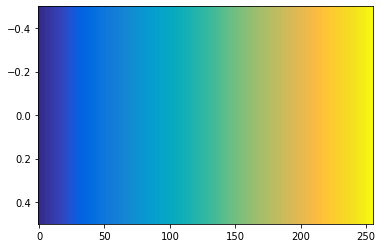

In [11]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)
# For use of "viscm view"
test_cm = parula_map

if __name__ == "__main__":
    import matplotlib.pyplot as plt
    import numpy as np

    try:
        from viscm import viscm
        viscm(parula_map)
    except ImportError:
        print("viscm not found, falling back on simple display")
        plt.imshow(np.linspace(0, 100, 256)[None, :], aspect='auto',
                   cmap=parula_map)
    plt.show()

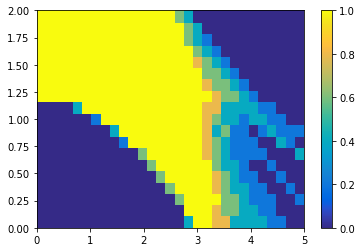

In [12]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

n_real = 5 # n_real <= 5

us = np.round(np.linspace(0,2,20),2)
ws = np.round(np.linspace(0,5,30),2)
# data = np.zeros((50,50,n_real,400,400))
wind_mat = np.zeros((20,30))

# wind = np.mean(wind.reshape(-1,3),axis=1)
wind = f['bp'][:]
wind_mat = np.mean(wind.reshape(20,30,5),axis=-1)
# for i in range(len(us)):
#     for j in range(len(ws)):
#         wind_mat[i,j] = np.mean(wind[i*30+j*5:i*30+(j+1)*5])

X, Y = np.meshgrid(ws,us)
fig, ax = plt.subplots()
im = ax.pcolormesh(X,Y,wind_mat,cmap=parula_map)
# im = plt.imshow(wind_mat,aspect='auto',cmap=parula_map)
ax.set_xlim(np.min(ws),np.max(ws))
ax.set_ylim(np.min(us),np.max(us))
plt.colorbar(im)
plt.show()    

In [13]:
U = f['U'][:]
W = f['W'][:]

In [14]:
uU = np.unique(U)
uW = np.unique(W)
X,Y = np.meshgrid(uW,uU)

In [15]:
def train_mask(U0,U1,W0,W1):
    pick_U = np.where((U >= U0) & (U <= U1))
    pick_W = np.where((W >= W0) & (W <= W1))
    return np.intersect1d(pick_U,pick_W)

In [16]:
print(uU.min(),uU.max(),uW.min(),uW.max())

0.0 2.0 0.0 5.0


In [17]:
print(uU.shape,uW.shape)
print(uU,uW)

(20,) (30,)
[0.   0.11 0.21 0.32 0.42 0.53 0.63 0.74 0.84 0.95 1.05 1.16 1.26 1.37
 1.47 1.58 1.68 1.79 1.89 2.  ] [0.   0.17 0.34 0.52 0.69 0.86 1.03 1.21 1.38 1.55 1.72 1.9  2.07 2.24
 2.41 2.59 2.76 2.93 3.1  3.28 3.45 3.62 3.79 3.97 4.14 4.31 4.48 4.66
 4.83 5.  ]


In [18]:
images = f["image"][:][:,:32,:8,np.newaxis]
print(images.shape)

(3000, 32, 8, 1)


## Define Neural network

In [19]:
# def scc_cnn2D(loss,optimizer,activation0,activation,x_shape):
#     in_dim = x_shape
#     input_img = Input(shape=in_dim)
   
#     x1 = Conv2D(16, 2, activation=activation0, padding='same')(input_img) # 33 10 16
#     x2 = Conv2D(32, 2, activation=activation0, padding='same')(x1) # 33 10 32
#     x3 = MaxPooling2D((2,2), padding='same')(x2) # 11 5 32
#     encoded = Conv2D(32, 2, activation=activation0, padding='same')(x3) # 11 5 32

#     y=UpSampling2D((2,2))(encoded) # 33 10 32
#     y=add([x2,y]) # 33 10 32
#     y=Conv2D(16, 2, activation=activation0, padding='same')(y) # 33 10 16
#     y=add([x1,y]) # 33 10 16
#     decoded = Conv2D(x_shape[-1], 2, activation=activation, padding='same')(y) # 33 10 1

#     cnn = Model(input_img, decoded)

#     cnn.compile(loss=loss,optimizer=optimizer)#,metrics=['accuracy']) #adadelta
#     return cnn

def scc_cnn2D(loss,optimizer,activation0,activation,x_shape):
    in_dim = x_shape
    input_img = Input(shape=in_dim)
   
    x1 = Conv2D(16, (2,2), strides=2, activation=activation0, padding='same')(input_img) # 16 5 16
    encoded = Conv2D(8, (2,2), strides=2, activation=activation0, padding='same')(x1) # 33 10 32

    y = Conv2DTranspose(16, kernel_size=2, strides=2, activation=activation0, padding='same')(encoded)
    y = Conv2DTranspose(16, kernel_size=2, strides=2, activation=activation0, padding='same')(y) # 33 10 16
    decoded = Conv2D(x_shape[-1], 2, activation=activation, padding='same')(y) # 33 10 1

    cnn = Model(input_img, decoded)

    cnn.compile(loss=loss,optimizer=optimizer)#,metrics=['accuracy']) #adadelta
    return cnn

In [20]:
cnn = scc_cnn2D("mse","adam","linear","relu",x_shape=(32,8,1))
cnn.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 8, 1)]        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 4, 16)         80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 2, 8)           520       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 16, 4, 16)         528       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 32, 8, 16)         1040      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 8, 1)          65        
Total params: 2,233
Trainable params: 2,233
Non-trainable params: 0
___________________________________________________________

## Helper functions

In [21]:
def norm2(y_true,y_pred):
    """ just the standard l2 norm, needed for evaluation """
    return np.sqrt(np.sum(np.abs(y_true - y_pred)**2))

def eval_loss(x_batch,y_batch,norm=norm2):
    a = []
    for i in range(x_batch.shape[0]):
        a.append(norm(x_batch[i],y_batch[i]))
    return np.array(a)

def training_run(x_train,choose_cnn, name = "", provide_cnn = False,
             load_prev=False, num_epochs = 10,  verbose_val=1, batch_size = 128, shuffle=True, early=False,
             loss="mse", activation0 = 'relu', activation = 'linear', optimizer = "adam"):
    """
    provide_cnn is to continue the training of a cnn
    load_prev is to load a previously trained network under the same paramters
    x_train provide training data
    """
    name_string = name
    CNN_filepath= 'CNN_data/Anomaly-Detection_' + name_string + 'weights.hdf5'

    cnn = choose_cnn(loss,optimizer,activation0,activation,x_train.shape[1:])
    if load_prev:
        cnn.load_weights(CNN_filepath)
    else:
        if provide_cnn:
            cnn = provide_cnn
        # checkpoint
        checkpoint = ModelCheckpoint(CNN_filepath, monitor='val_loss', verbose=0, save_best_only=False, mode='max')
        callbacks_list = [checkpoint]
        if early:
            early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto', baseline=None)#, restore_best_weights=True)
            callbacks_list.append(early_stop)

        history=cnn.fit(x_train, x_train, epochs=num_epochs, batch_size=batch_size,validation_data=(x_train,x_train),callbacks=callbacks_list,verbose=verbose_val,shuffle=shuffle)
        np.savez('CNN_data/Anomaly-Detection_history_cnn_' + name_string + '.npz',loss=history.history['loss'],val_loss=history.history['val_loss'])#,acc=history.history['acc'],val_acc=history.history['val_acc'])

     # training history
    plotname = 'plots/Anomaly-Detection_training-history' +  name_string
    hist = np.load('CNN_data/Anomaly-Detection_history_cnn_' + name_string + '.npz',allow_pickle="True")
    loss = hist["loss"]
    val_loss = hist["val_loss"]
    plt.plot(loss, linewidth=2, label='Train')
    plt.plot(val_loss, linewidth=2, label='Val')
    plt.legend(loc='upper right')
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.yscale("log")
    #plt.ylim(ymin=0.70,ymax=1)
    plt.savefig(plotname + 'training.png', format="png")
    plt.show()
    return cnn


In [22]:
def create_out(cnn1):
    """
    Creates (dim_U, dim_W) matrix of the output loss and the standard deviation
    """
    images_out = cnn1.predict(images)

    res = eval_loss(images,images_out,norm=norm2)/eval_loss(images,0*images,norm=norm2)

    uW = np.unique(W)

    uU = np.unique(U)

    X,Y = np.meshgrid(uW,uU)

    out = np.zeros((len(uW),len(uU)))
    dout = np.zeros((len(uW),len(uU)))

    for i,w_ in enumerate(uW):
        for j,u_ in enumerate(uU):
            mask = np.intersect1d(np.where(U == u_),np.where(W == w_))
            out[i,j] = np.mean(res[mask])
            dout[i,j] = np.std(res[mask])
    return out, dout, res

In [23]:
# A full run consisting of training and evaluation
def full_run(x_train, activation = "linear", activation0="relu",
             choose_cnn = scc_cnn2D, provide_cnn = False,
             num_batch_epochs = 1, batch_epochs=30, batch_size = 16, load_prev = False, training = 0,dis = 'random_dis',
             pick_U = 8):
    """
    choose_cnn: provide function that builds respective architecture
    provide_cnn: continue training of a previous NN instance
    batch_epochs: number of epochs per training-batch
    num_batch_epochs: number of training-batches (sorry for confusing terminology of "batch")
    batch_size: tf parameter
    name: provide name for saving network parameters
    load_prev: when the training was already done, reload parameters (all hyper-parameters and parameters must match!)
    pick_U: for evaluation, which u is picked to display the single cut
    """
    
    for batch in range(num_batch_epochs):
        if batch == 0:
            provide_cnn = provide_cnn
        else:
            provide_cnn = cnn1
        cnn1 = training_run(x_train = x_train,choose_cnn = choose_cnn, name = "{}_{}".format(dis,training), provide_cnn = provide_cnn,
             load_prev=load_prev, num_epochs = batch_epochs,  verbose_val=1, batch_size = batch_size, shuffle=True, early=True,
             loss="mse", activation0 = 'relu', activation = 'linear', optimizer = "adam")
        out,dout,res = create_out(cnn1)
        
        
        trans_line = Y[pick_U,:][0]
        ### Plot
        fig, ax = plt.subplots()
        # plot result
        im = ax.pcolormesh(X,Y,out.T,cmap="jet")
        fig.colorbar(im,ax=ax)
        ax.set_xlabel('W/t',fontsize=16)
        ax.set_ylabel('U/t',fontsize=16)
        
        # theory curve
        # ax.contour(x0,y0,np.round(chern_number.T),levels=2)
        ax.set_xlim(uW.min(),uW.max())
        ax.set_ylim(uU.min(),uU.max())
        ax.plot([uW.min(),uW.max()],[trans_line]*2,"--",c='k',linewidth=4)
        for ws,us in zip(train_Ws,train_Us):
            # Create a Rectangle patch
            rect = patches.Rectangle((ws[0], us[0]), ws[1]-ws[0], us[1]-us[0], linewidth=2, edgecolor='aqua', facecolor='none')
            # Add the patch to the Axes
            ax.add_patch(rect)
        plt.show()

        fig, ax = plt.subplots()
        plt.errorbar(X[pick_U,:],out.T[pick_U,:],yerr=dout.T[pick_U,:],c='mediumblue',marker='^',markersize=10,mfc='mediumblue',mec='k')
        des = np.round(Y[pick_U,:][0],2)
        plt.title(f"U ={des}")
        # for Ws,Us in zip(train_Ws,train_Us):
        #     plt.fill_between(*[Us],out.T[:,pick_U].min(),out.T[:,pick_U].max(),alpha=0.3,color="orange")
        # ax.axvline(6.1, color='black') # expected transition
        # ax.axvline(6.8, color='black') # expected transition
        plt.show()
    return cnn1, out, dout, res

## Training

In [24]:
# this is here the results, i.e. the loss values and its error are going to be saved
# res is the full-stack data list while out is averaged and aranged
cnns, outs, douts, res = [None] * 3,[None] * 3, [None] * 3, [None] * 3

In [25]:
train_Uss = []
train_Wss = []

### Topo. trivial area

In [26]:
training = 0

In [27]:
train_Us = [(0.,0.5)]
train_Ws = [(0,1)]
train_Uss.append(train_Us)
train_Wss.append(train_Ws)

In [28]:
tf.keras.backend.clear_session()

[(150, 32, 8, 1)]


(0.0, 5.0)

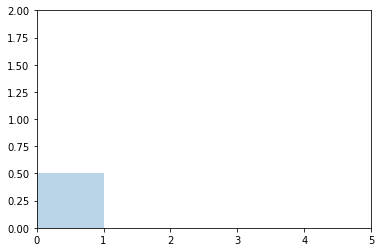

In [29]:
x_train = []
for Ws,Us in zip(train_Ws,train_Us):
    x_train.append(f["image"][train_mask(*Us,*Ws)][:][:,:32,:8,np.newaxis])
print([_.shape for _ in x_train])
x_train = np.concatenate(x_train)
fig, ax = plt.subplots()
# ax.contour(x0,y0,np.round(chern_number.T),levels=2)
for ws,us in zip(train_Ws,train_Us):
    plt.fill_between(*[ws],*us,alpha=0.3)
plt.ylim(U.min(),U.max())
plt.xlim(W.min(),W.max())

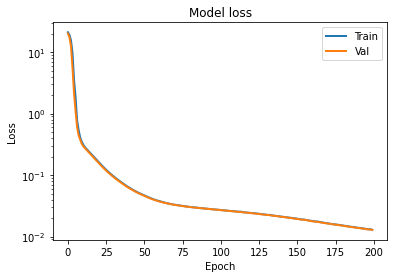

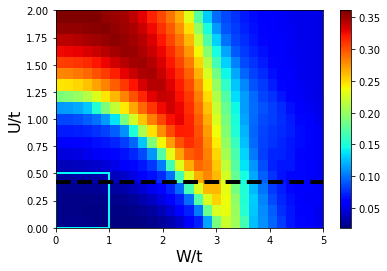

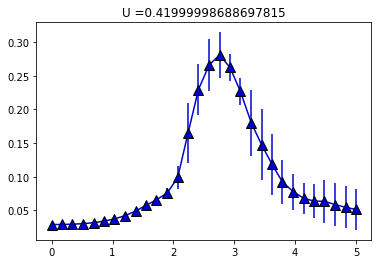

In [30]:
cnns[training], outs[training], douts[training], res[training] = full_run(x_train, load_prev=True, batch_epochs=200, training = training, dis='quasiper_dis',pick_U=4)

In [ ]:
if save == True:
    cnns[training].save(f"networks/anomaly_detection/Anomaly-Detection-network—{model}—{training}")

INFO:tensorflow:Assets written to: networks/anomaly_detection/Anomaly-Detection-network—quasiper_dis—0/assets


In [ ]:
training = 1

In [ ]:
train_Us = [(1.5,2.0)]
train_Ws = [(0,2)]
train_Uss.append(train_Us)
train_Wss.append(train_Ws)

In [ ]:
tf.keras.backend.clear_session()

[(300, 8)]


(0.0, 5.0)

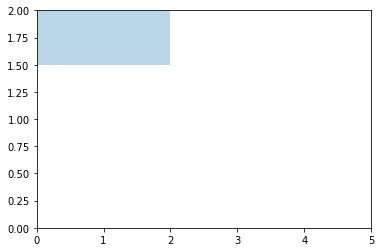

In [ ]:
x_train = []
for Ws,Us in zip(train_Ws,train_Us):
    # x_train.append(f["image"][train_mask(*Us,*Ws)][:][:,:32,:8,np.newaxis])
    x_train.append(f["image"][train_mask(*Us,*Ws)][:][:,0,:8])
print([_.shape for _ in x_train])
x_train = np.concatenate(x_train)
fig, ax = plt.subplots()
# ax.contour(x0,y0,np.round(chern_number.T),levels=2)
for Ws,Us in zip(train_Ws,train_Us):
    plt.fill_between(*[Ws],*Us,alpha=0.3)
plt.ylim(U.min(),U.max())
plt.xlim(W.min(),W.max())

Epoch 1/500
19/19 [==============================] - 0s 11ms/step - loss: 30.0638 - val_loss: 30.0667
Epoch 2/500
19/19 [==============================] - 0s 6ms/step - loss: 29.7669 - val_loss: 29.8969
Epoch 3/500
19/19 [==============================] - 0s 6ms/step - loss: 29.5418 - val_loss: 29.7285
Epoch 4/500
19/19 [==============================] - 0s 5ms/step - loss: 29.8001 - val_loss: 29.5607
Epoch 5/500
19/19 [==============================] - 0s 5ms/step - loss: 29.5856 - val_loss: 29.3944
Epoch 6/500
19/19 [==============================] - 0s 5ms/step - loss: 29.3631 - val_loss: 29.2290
Epoch 7/500
19/19 [==============================] - 0s 5ms/step - loss: 29.4112 - val_loss: 29.0644
Epoch 8/500
19/19 [==============================] - 0s 5ms/step - loss: 28.5312 - val_loss: 28.9014
Epoch 9/500
19/19 [==============================] - 0s 5ms/step - loss: 28.6410 - val_loss: 28.7390
Epoch 10/500
19/19 [==============================] - 0s 5ms/step - loss: 29.1567 - val_lo

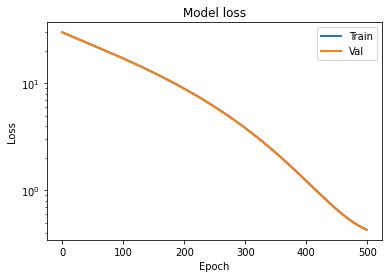

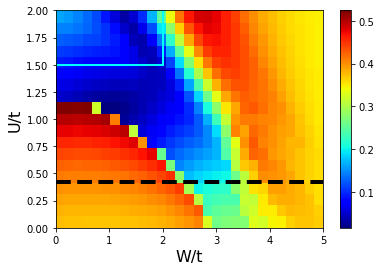

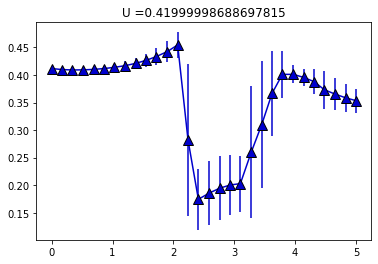

In [ ]:
cnns[training], outs[training], douts[training], res[training] = full_run(x_train, load_prev=False, batch_epochs=500, training = training, dis='random_dis_1D_NN',pick_U=4)

In [ ]:
if save == True:
    cnns[training].save(f"networks/anomaly_detection/Anomaly-Detection-network-{model}-{training}")

INFO:tensorflow:Assets written to: networks/anomaly_detection/Anomaly-Detection-network-quasiper_dis-1/assets


### Topo. nontrivial area

In [ ]:
training = 2

In [ ]:
train_Us = [(1.5,2)]
train_Ws = [(4,5)]
train_Uss.append(train_Us)
train_Wss.append(train_Ws)

In [ ]:
tf.keras.backend.clear_session()

[(150, 32, 8, 1)]


(0.0, 5.0)

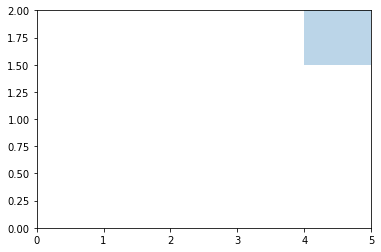

In [ ]:
x_train = []
for Ws,Us in zip(train_Ws,train_Us):
    x_train.append(f["image"][train_mask(*Us,*Ws)][:,:,:8][:,:,:,np.newaxis])
print([_.shape for _ in x_train])
x_train = np.concatenate(x_train)
fig, ax = plt.subplots()
# ax.contour(x0,y0,np.round(chern_number.T),levels=2)
for Ws,Us in zip(train_Ws,train_Us):
    plt.fill_between(*[Ws],*Us,alpha=0.3)
plt.ylim(U.min(),U.max())
plt.xlim(W.min(),W.max())

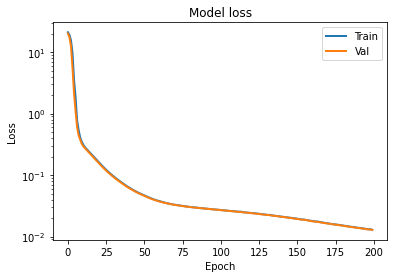

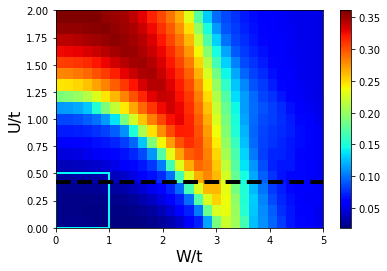

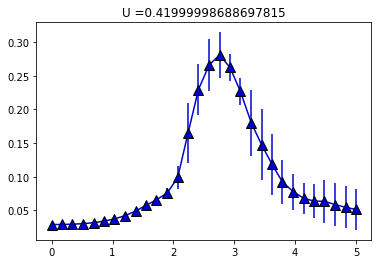

In [ ]:
cnns[training], outs[training], douts[training], res[training] = full_run(x_train, load_prev=True, batch_epochs=200, training = training, dis='quasiper_dis',pick_U=4)

In [ ]:
if save == True:
    cnns[training].save(f"networks/anomaly_detection/Anomaly-Detection-network-{training}")

INFO:tensorflow:Assets written to: networks/anomaly_detection/Anomaly-Detection-network-2/assets


## Boundarty estimation

In [50]:
def get_pickle(x, xmin,xmax):
    #x = np.asarray(x)
    pickle = np.where((x>= xmin) & (x <= xmax))
    return pickle, x[pickle]

In [32]:
# tanh for fitting with curve_fit from scipy.optimize import curve_fit
def func(x, a, b, c, d):
    return a * np.tanh(b * x - c) + d

In [33]:
import numpy as np
import matplotlib.pyplot as plt

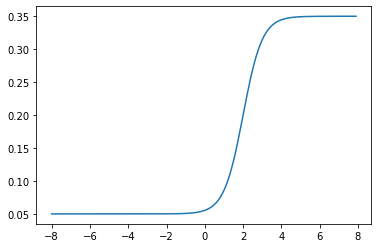

In [34]:
def tanh_func(x, a=0.15, b=1, c=2, d=0.2):
    return a * np.tanh(b * x - c) + d
x = np.arange(-8,8,0.1)
plt.plot(x,tanh_func(x))

In [35]:
def get_xxyy(u0,u1,w,training, p0 = [0.1, 1, 2,0.3], debug=False):
    pickle = np.intersect1d(np.where((U>= u0) & (U <= u1)),np.where(W == w ))
    xx,yy = U[pickle],res[training][pickle]
    sorter = np.argsort(xx)
    xx,yy = xx[sorter],yy[sorter]
    popt, pcov = curve_fit(func, xx, yy, p0 = p0,maxfev = 5000)
    a, b, c, d = popt
    da, db, dc, dd = np.sqrt(np.diag(pcov))
    xc = c/b
    dxc = np.abs(xc * (dc/np.abs(c) - db/np.abs(b)))
    if debug:
        print(f"popt = {popt}, w {w:.4f}, db = {db:.4f}, dc = {dc:.4f}, xc = {xc:.4f}, dxc = {dxc:.4f}")
    return xx,yy,func(xx,*popt), xc, dxc


In [36]:
def get_xxyy1(w0,w1,u,training, p0 = [0.05, -0.8, -2,0.1], debug=False):
    pickle = np.intersect1d(np.where((W>= w0) & (W <= w1)),np.where(U == u ))
    xx,yy = W[pickle],res[training][pickle]
    sorter = np.argsort(xx)
    xx,yy = xx[sorter],yy[sorter]
    popt, pcov = curve_fit(func, xx, yy, p0 = p0,maxfev = 5000)
    a, b, c, d = popt
    da, db, dc, dd = np.sqrt(np.diag(pcov))
    xc = c/b
    dxc = np.abs(xc * (dc/np.abs(c) - db/np.abs(b)))
    if debug:
        print(f"popt = {popt}, u {u:.4f}, db = {db:.4f}, dc = {dc:.4f}, xc = {xc:.4f}, dxc = {dxc:.4f}")
    return xx,yy,func(xx,*popt), xc, dxc


popt = [0.15415067 3.87985635 2.55912878 0.1870857 ], w 1.9000, db = 0.2631, dc = 0.1812, xc = 0.6596, dxc = 0.0020


<ErrorbarContainer object of 3 artists>

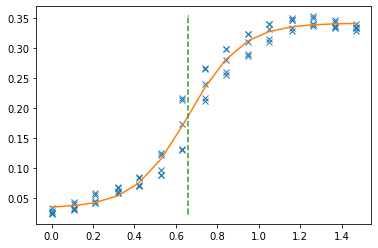

In [37]:
# example (gonna do this in a for-loop)
xx,yy,fxx, xc, dxc = get_xxyy(0.,1.47,1.9,p0 = [0.1, 1, 2,0.2],training=0, debug=True)
plt.plot(xx,yy,"x")
plt.plot(xx,fxx)
plt.errorbar([xc]*2,[yy.min(),yy.max()],xerr=[dxc,dxc],fmt="--")

popt = [  0.05760602  -3.47966071 -12.9245952    0.12460641], u 0.0000, db = 2.1594, dc = 8.0213, xc = 3.7143, dxc = 0.0001


<ErrorbarContainer object of 3 artists>

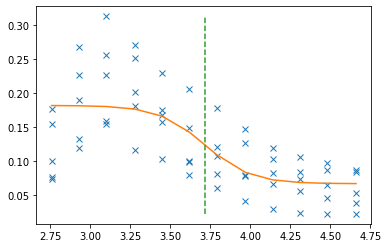

In [38]:
# example (gonna do this in a for-loop)
xx,yy,fxx, xc, dxc = get_xxyy1(2.6,4.8,0,training=0, debug=True) 
# [3.89, 3.7, 3.6, 3.5, 3.4, 3.29, 3.14, 2.89, 2.68, 2.5]
# [3.5141，3.4156,3.3210, 3.2101,3.1289，3.0576，2.9759,2.8906, 2.8098, 2.7621, 2.6842, 2.6209, 2.5398, 2.474]
# [3.68402499 3.59496375 3.54939523 3.4979808  3.3876457  3.32609899
#  3.23159924 3.18209469 3.10472076 3.0675008  3.03385981 2.97710396
#  2.94082751 2.87511448 2.79067427 2.7141822  2.63675663 2.54961916
#  2.46292325 2.38086631]
plt.plot(xx,yy,"x")
plt.plot(xx,fxx)
plt.errorbar([xc]*2,[yy.min(),yy.max()],xerr=[dxc,dxc],fmt="--")

In [39]:
vbes_dict = {'0.0':[2.5,5],'0.11':[2.5,5],'0.21':[2.4,5],'0.32':[2.2,5],'0.42':[2.,5],'0.53':[1.6,5],'0.63':[1.5,5],'0.74':[1.2,5],'0.84':[1,5],'0.95':[.8,5],
                '1.05':[.8,5],'1.16':[0.8,5],'1.26':[0,5],'1.37':[0,5],'1.47':[0,5],'1.58':[0.,5],'1.68':[2,3.3],'1.79':[2,3.3],'1.89':[1.9,3.3],
                '2.0':[1.8,3.3]}
vbes_dict1 = {'0.0':[2.5,3.4],'0.11':[2.2,3.4],'0.21':[2.2,3.4]}
def get_vboundary(U0,vbes_dict,training = 0, p0 = [0.05, -0.8, -2,0.1],plot=True, debug=False):
    # get boundary data for U0, vertical boundary 
    xcs0 = np.zeros(len(U0))
    dxcs0 = np.zeros(len(U0))
    nrows=len(pickle[0])//3 + 1
    if plot:
        fig, axs = plt.subplots(nrows=nrows, ncols=3,figsize=(15,4*nrows))
    for row,u_ in enumerate(U0):
        xx,yy,fxx, xc, dxc = get_xxyy1(vbes_dict[str(u_)][0],vbes_dict[str(u_)][1],u_,training,p0,debug)
        xcs0[row], dxcs0[row] = xc, dxc
        if plot:
            ax = axs[row//3,row%3]
            ax.plot(xx,yy,"x")
            ax.plot(xx,fxx)
            ax.plot([xc]*2,[yy.min(),yy.max()],"--")
            ax.set_title(f"w = {w_}")
    return xcs0, dxcs0


In [40]:
hbes_dict = {'0.0':[0,1.47],'0.17':[0,1.47],'0.34':[0,1.47],'0.52':[0,1.47],'0.69':[0,1.47],'0.86':[0,1.47],'1.03':[0,1.47],'1.21':[0,1.47],'1.38':[0,1.47],'1.55':[0,1.47],'1.72':[0,1.47],'1.9':[0,1.47],
                '2.07':[0,1.47],'2.24':[0,1.47],'2.41':[0,1.47],'2.59':[0,1.]}
def get_hboundary(W0,hbes_dict,training = 0, p0 = [0.1, 1, 2,0.2],plot=True, debug=False):
    # get boundary data for W0, horizontal boundary
    xcs0 = np.zeros(len(W0))
    dxcs0 = np.zeros(len(W0))
    nrows=len(pickle[0])//3 + 1
    if plot:
        fig, axs = plt.subplots(nrows=nrows, ncols=3,figsize=(15,4*nrows))
    for row,w_ in enumerate(W0):
        xx,yy,fxx, xc, dxc = get_xxyy(hbes_dict[str(w_)][0],hbes_dict[str(w_)][1],w_,training,p0,debug)
        xcs0[row], dxcs0[row] = xc, dxc
        if plot:
            ax = axs[row//3,row%3]
            ax.plot(xx,yy,"x")
            ax.plot(xx,fxx)
            ax.plot([xc]*2,[yy.min(),yy.max()],"--")
            ax.set_title(f"w = {w_}")
    return xcs0, dxcs0


In [41]:
print(uU,uW)

[0.   0.11 0.21 0.32 0.42 0.53 0.63 0.74 0.84 0.95 1.05 1.16 1.26 1.37
 1.47 1.58 1.68 1.79 1.89 2.  ] [0.   0.17 0.34 0.52 0.69 0.86 1.03 1.21 1.38 1.55 1.72 1.9  2.07 2.24
 2.41 2.59 2.76 2.93 3.1  3.28 3.45 3.62 3.79 3.97 4.14 4.31 4.48 4.66
 4.83 5.  ]


## Iteration 1

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


[0.   0.11 0.21] [2.80647903 2.67118545 2.54661341]


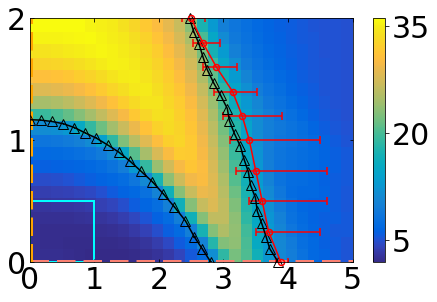

In [522]:
training = 0
pickle, w0 = get_pickle(uW,0,2.7)
xcs0, dxcs0 = get_hboundary(w0,hbes_dict,training = training,plot=False)
pickle, u01 = get_pickle(uU,0,2)
xcs01, dxcs01 = get_vboundary(u01,vbes_dict, training = training,plot=False,debug=False)
pickle, u02 = get_pickle(uU,0,0.26)
xcs02, dxcs02 = get_vboundary(u02,vbes_dict1, training = training,plot=False,debug=False)
# cleanup points where fit failed
mask = np.where(np.logical_or(xcs01 < 2., xcs01 >4.5))[0]
xcs01 = np.delete(xcs01,mask)
dxcs01 = np.delete(dxcs01,mask)
u01 = np.delete(u01,mask)

# cleanup points where fit failed
mask = np.where(np.logical_or(xcs0 < 0, xcs0 >3.5))[0]
xcs0 = np.delete(xcs0,mask)
dxcs0 = np.delete(dxcs0,mask)
w0 = np.delete(w0,mask)


# cleanup points where fit failed
mask = np.where(np.logical_or(xcs02 < 0, xcs02 >3.5))[0]
xcs02 = np.delete(xcs02,mask)
dxcs02 = np.delete(dxcs02,mask)
u02 = np.delete(u02,mask)
print(u02,xcs02)
w0 = np.concatenate((w0,xcs02[::-1]))
xcs0 = np.concatenate((xcs0,u02[::-1]))
dxcs0 = np.concatenate((dxcs0,dxcs02[::-1]))


fig, ax = plt.subplots()
# plot result
im = ax.pcolormesh(X,Y,100*outs[training].T,cmap=parula_map)
cbar = fig.colorbar(im,ax=ax)
cbar.set_ticks([5,20,35])
# theory curve
# ax.contour(x0,y0,np.round(chern_number.T),levels=2)
ax.set_xlim(uW.min(),uW.max())
ax.set_ylim(uU.min(),uU.max())
plt.yticks([0,1,2])
plt.xticks([0,1,2,3,4,5])
for ws,us in zip(train_Wss[training],train_Uss[training]):
    # Create a Rectangle patch
    rect = patches.Rectangle((ws[0], us[0]), ws[1]-ws[0], us[1]-us[0], linewidth=2, edgecolor='aqua', facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)
ax.plot([0,5],[0,0],"--",c='salmon',linewidth=5)
ax.plot([0,0],[0,2],"--",c='orange',linewidth=5)
plt.errorbar(w0, xcs0, xerr=dxcs0,marker='^',mfc='none',ms=10,color="k")
plt.errorbar(xcs01, u01,  xerr=dxcs01,marker='^',mfc='none',ms=10,color="k",clip_on=False)

####################################

wct2=np.array([3.89, 3.7, 3.6, 3.5, 3.4, 3.29, 3.14, 2.89, 2.68, 2.5]);
uct2=np.array([0, 0.25, 0.5, 0.75, 1, 1.2, 1.4, 1.6, 1.8, 2.0]);
wct2l=np.array([0.07, 0.2, 0.2, 0.3, 0.3, 0.29, 0.28, 0.2, 0.16, 0.14]);
wct2r=np.array([0.11, 0.8, 1.0, 1.1, 1.1, 0.62, 0.38, 0.32, 0.26, 0.21]);
wcerr=np.vstack([wct2l[None,:],wct2r[None,:]])
plt.errorbar(wct2,uct2,xerr=wcerr,marker='o',ms=6,mfc='none',color='r',capsize=4,mew=1.5,clip_on=False)
###################################

# ax.set_clip_on(True)
ax.tick_params(bottom=True, top=True, left=True, right=True,direction="in")
# plt.ylabel("U/t",fontsize=20)
# plt.xlabel("W/t",fontsize=20)
plt.tight_layout(pad=0)
# plt.savefig("boundaries_solo.png",dpi=300,transparent=True)
plt.show()

In [42]:
training = 0

In [43]:
pickle, w0 = get_pickle(uW,0,2.7)
xcs0, dxcs0 = get_hboundary(w0,hbes_dict,training = training,plot=False)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [44]:
pickle, u01 = get_pickle(uU,0,2)
xcs01, dxcs01 = get_vboundary(u01,vbes_dict, training = training,plot=False,debug=False)

In [45]:
pickle, u02 = get_pickle(uU,0,0.26)
xcs02, dxcs02 = get_vboundary(u02,vbes_dict1, training = training,plot=False,debug=False)

In [46]:
# cleanup points where fit failed
mask = np.where(np.logical_or(xcs01 < 2., xcs01 >4.5))[0]
xcs01 = np.delete(xcs01,mask)
dxcs01 = np.delete(dxcs01,mask)
u01 = np.delete(u01,mask)

# cleanup points where fit failed
mask = np.where(np.logical_or(xcs0 < 0, xcs0 >3.5))[0]
xcs0 = np.delete(xcs0,mask)
dxcs0 = np.delete(dxcs0,mask)
w0 = np.delete(w0,mask)


# cleanup points where fit failed
mask = np.where(np.logical_or(xcs02 < 0, xcs02 >3.5))[0]
xcs02 = np.delete(xcs02,mask)
dxcs02 = np.delete(dxcs02,mask)
u02 = np.delete(u02,mask)

In [47]:
print(u02,xcs02)
w0 = np.concatenate((w0,xcs02[::-1]))
xcs0 = np.concatenate((xcs0,u02[::-1]))
dxcs0 = np.concatenate((dxcs0,dxcs02[::-1]))

[0.   0.11 0.21] [2.80647903 2.67118545 2.54661341]


In [51]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

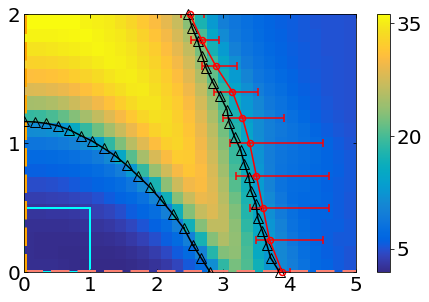

In [52]:

fig, ax = plt.subplots()
# plot result
im = ax.pcolormesh(X,Y,100*outs[training].T,cmap=parula_map)
cbar = fig.colorbar(im,ax=ax)
cbar.set_ticks([5,20,35])
# theory curve
# ax.contour(x0,y0,np.round(chern_number.T),levels=2)
ax.set_xlim(uW.min(),uW.max())
ax.set_ylim(uU.min(),uU.max())
plt.yticks([0,1,2])
plt.xticks([0,1,2,3,4,5])
for ws,us in zip(train_Wss[training],train_Uss[training]):
    # Create a Rectangle patch
    rect = patches.Rectangle((ws[0], us[0]), ws[1]-ws[0], us[1]-us[0], linewidth=2, edgecolor='aqua', facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)
ax.plot([0,5],[0,0],"--",c='salmon',linewidth=5)
ax.plot([0,0],[0,2],"--",c='orange',linewidth=5)
plt.errorbar(w0, xcs0, xerr=dxcs0,marker='^',mfc='none',ms=10,color="k")
plt.errorbar(xcs01, u01,  xerr=dxcs01,marker='^',mfc='none',ms=10,color="k",clip_on=False)

####################################

wct2=np.array([3.89, 3.7, 3.6, 3.5, 3.4, 3.29, 3.14, 2.89, 2.68, 2.5]);
uct2=np.array([0, 0.25, 0.5, 0.75, 1, 1.2, 1.4, 1.6, 1.8, 2.0]);
wct2l=np.array([0.07, 0.2, 0.2, 0.3, 0.3, 0.29, 0.28, 0.2, 0.16, 0.14]);
wct2r=np.array([0.11, 0.8, 1.0, 1.1, 1.1, 0.62, 0.38, 0.32, 0.26, 0.21]);
wcerr=np.vstack([wct2l[None,:],wct2r[None,:]])
plt.errorbar(wct2,uct2,xerr=wcerr,marker='o',ms=6,mfc='none',color='r',capsize=4,mew=1.5,clip_on=False)
###################################

# ax.set_clip_on(True)
ax.tick_params(bottom=True, top=True, left=True, right=True,direction="in")
# plt.ylabel("U/t",fontsize=20)
# plt.xlabel("W/t",fontsize=20)
plt.tight_layout(pad=0)
plt.savefig("/content/boundaries_solo.png",dpi=300,transparent=True)
plt.show()

In [537]:
print(xcs01)

[3.85043668 3.71758625 3.66002604 3.59125169 3.52281317 3.49518747
 3.4199683  3.38558207 3.32103259 3.26284158 3.17326785 3.09146743
 3.05941586 2.954083   2.84810451 2.74723623 2.68420314 2.62090656
 2.53976552 2.47415794]


In [ ]:
print(Y[6,:])

[0.63 0.63 0.63 0.63 0.63 0.63 0.63 0.63 0.63 0.63 0.63 0.63 0.63 0.63
 0.63 0.63 0.63 0.63 0.63 0.63 0.63 0.63 0.63 0.63 0.63 0.63 0.63 0.63
 0.63 0.63]


In [ ]:
np.load

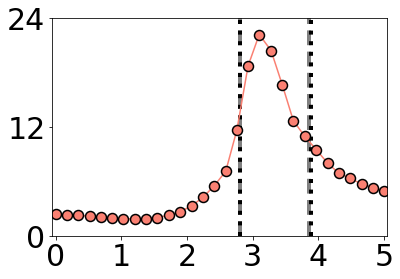

In [543]:
fig, ax = plt.subplots()
plt.errorbar(X[0,:],100*outs[training].T[0,:],c='salmon',marker='o',markersize=10,mfc='salmon',mec='k',mew=1.5)
plt.axvline(x=2.80647903,ls='--',c='gray',lw=4)
plt.axvline(x=2.81,ls='dotted',c='k',lw=4)
plt.axvline(x=3.85043668 ,ls='--',c='gray',lw=4)
plt.axvline(x=3.89 ,ls='dotted',c='k',lw=4)
# plt.tight_layout(pad=0)
ax.set_xlim(-0.05,5.05)
ax.set_ylim(0,24)
plt.yticks([0,12,24])
plt.xticks([0,1,2,3,4,5])
plt.savefig("/content/boundaries_inset2.png",dpi=300,transparent=True)


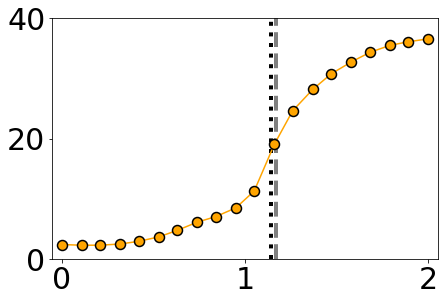

In [ ]:
fig, ax = plt.subplots()
plt.errorbar(Y[:,0],100*outs[training].T[:,0],c='orange',marker='o',markersize=10,mfc='orange',mec='k',mew=1.5)
plt.axvline(x=1.14,ls='dotted',c='k',lw=4)
plt.axvline(x=1.1691,ls='--',c='gray',lw=4)
ax.set_xlim(-0.05,2.05)
ax.set_ylim(0,40)
plt.yticks([0,20,40])
plt.xticks([0,1,2])
plt.tight_layout(pad=0)
plt.savefig("boundaries_inset1.png",dpi=300,transparent=True)

In [544]:
np.savez(f'{training}_boundary_estimation.npz',a=[w0,xcs0,dxcs0], b=[xcs01,u01,dxcs01])

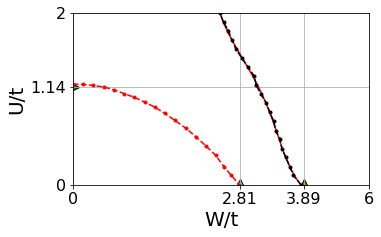

In [550]:
fig, ax = plt.subplots()
# arch = np.load(f'0_boundary_estimation.npz')
# w0, xcs0, dxcs0 = arch['a']
# xcs01,u01,dxcs01 = arch['b']
plt.errorbar(w0, xcs0, yerr=dxcs0,fmt=".--",color="red")
plt.errorbar(xcs01, u01,  yerr=dxcs01,fmt=".--",color="k")
plt.scatter(x=0.,y=1.14,c='g',s=150,marker='>',ec='k')
plt.scatter(x=2.81,y=0,c='cyan',s=150,marker='^',ec='k')
plt.scatter(x=3.89,y=0,c='olive',s=150,marker='^',ec='k')
ax.set_xlim(0,5)
ax.set_ylim(0,2)
plt.yticks([0,1.14,2])
plt.xticks([0,2.81,3.89,5])
ax = plt.gca()
ax.set_yticklabels(['0','1.14','2'],fontsize=16)
ax.set_xticklabels(['0','2.81','3.89','6'],fontsize=16)
###############################################
res1 = np.polyfit(u01,xcs01,4)
p1 = np.poly1d(res1)
plt.plot(p1(np.linspace(0,2,30)),np.linspace(0,2,30),color="r")
plt.ylabel("U/t",fontsize=20)
plt.xlabel("W/t",fontsize=20)
plt.grid()
plt.tight_layout()

In [18]:
print(w0,xcs0)
print(xcs01,u01)

[0.         0.17       0.34       0.51999998 0.69       0.86000001
 1.02999997 1.21000004 1.38       1.54999995 1.72000003 1.89999998
 2.06999993 2.24000001 2.41000009 2.54661341 2.67118545 2.80647903] [1.16909331 1.16547885 1.15439686 1.1357158  1.10446844 1.05999392
 1.01780746 0.96028691 0.9023197  0.82980272 0.74788144 0.65959369
 0.55979819 0.45390464 0.34050618 0.20999999 0.11       0.        ]
[3.68402499 3.59496375 3.54939523 3.4979808  3.3876457  3.32609899
 3.23159924 3.18209469 3.10472076 3.0675008  3.03385981 2.97710396
 2.94082751 2.87511448 2.79067427 2.7141822  2.63675663 2.54961916
 2.46292325 2.38086631] [0.         0.11       0.20999999 0.31999999 0.41999999 0.52999997
 0.63       0.74000001 0.83999997 0.94999999 1.04999995 1.15999997
 1.25999999 1.37       1.47000003 1.58000004 1.67999995 1.78999996
 1.88999999 2.        ]


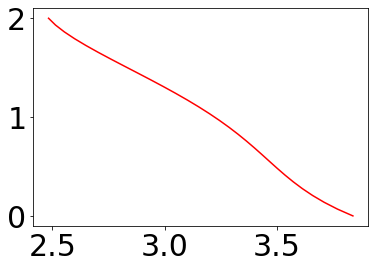

In [551]:
res1 = np.polyfit(u01,xcs01,4)
p1 = np.poly1d(res1)
plt.plot(p1(np.linspace(0,2,30)),np.linspace(0,2,30),color="r")

In [552]:
print(p1([0.25,0.5,0.75]))

[3.63100736 3.49320438 3.36902176]


## Iteration 2

In [ ]:
training = 1

In [ ]:
pickle, w1 = get_pickle(uW,0,3)
xcs1, dxcs1 = get_hboundary(w1,training = training,plot=False)

In [ ]:
pickle, u11 = get_pickle(uU,0,2)
xcs11, dxcs11 = get_vboundary(u11, training = training,plot=False,debug=False)

In [ ]:
# cleanup points where fit failed
mask = np.where(np.logical_or(xcs11 < 2., xcs11 >4.5))[0]
xcs11 = np.delete(xcs11,mask)
dxcs11 = np.delete(dxcs11,mask)
u11 = np.delete(u11,mask)

# cleanup points where fit failed
mask = np.where(np.logical_or(xcs1 < 0, xcs1 >3.5))[0]
xcs1 = np.delete(xcs1,mask)
dxcs1 = np.delete(dxcs1,mask)
w1 = np.delete(w1,mask)

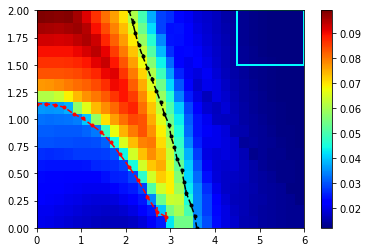

In [ ]:
fig, ax = plt.subplots()
# plot result
im = ax.pcolormesh(X,Y,outs[training].T,cmap="jet")
fig.colorbar(im,ax=ax)
# theory curve
# ax.contour(x0,y0,np.round(chern_number.T),levels=2)
ax.set_xlim(uW.min(),uW.max())
ax.set_ylim(uU.min(),uU.max())
for ws,us in zip(train_Wss[training],train_Uss[training]):
    # Create a Rectangle patch
    rect = patches.Rectangle((ws[0], us[0]), ws[1]-ws[0], us[1]-us[0], linewidth=2, edgecolor='aqua', facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)
plt.errorbar(w1, xcs1, yerr=dxcs1,fmt=".--",color="red")
plt.errorbar(xcs11, u11,  yerr=dxcs11,fmt=".--",color="k")
plt.show()

## Iteration 3

In [ ]:
training = 2

In [ ]:
pickle, w2 = get_pickle(uW,0,3)
xcs2, dxcs2 = get_hboundary(w2,training = training,plot=False)

In [ ]:
pickle, u21 = get_pickle(uU,0,2)
xcs21, dxcs21 = get_vboundary(u21, training = training,plot=False,debug=False)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
# cleanup points where fit failed
mask = np.where(np.logical_or(xcs21 < 2., xcs21 >4.5))[0]
xcs21 = np.delete(xcs21,mask)
dxcs21 = np.delete(dxcs21,mask)
u21 = np.delete(u21,mask)

# cleanup points where fit failed
mask = np.where(np.logical_or(xcs2 < 0, xcs2 >3.5))[0]
xcs2 = np.delete(xcs2,mask)
dxcs2 = np.delete(dxcs2,mask)
w2 = np.delete(w2,mask)

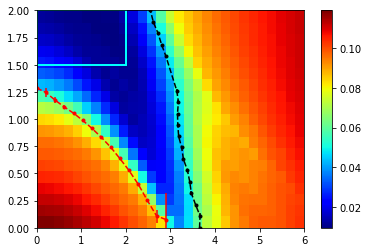

In [ ]:
fig, ax = plt.subplots()
# plot result
im = ax.pcolormesh(X,Y,outs[training].T,cmap="jet")
fig.colorbar(im,ax=ax)
# theory curve
# ax.contour(x0,y0,np.round(chern_number.T),levels=2)
ax.set_xlim(uW.min(),uW.max())
ax.set_ylim(uU.min(),uU.max())
for ws,us in zip(train_Wss[training],train_Uss[training]):
    # Create a Rectangle patch
    rect = patches.Rectangle((ws[0], us[0]), ws[1]-ws[0], us[1]-us[0], linewidth=2, edgecolor='aqua', facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)
    # plt.fill_between(*[ws],*us,alpha=0.5,color="k")
plt.errorbar(w2, xcs2, yerr=dxcs2,fmt=".--",color="red")
plt.errorbar(xcs21, u21,  yerr=dxcs21,fmt=".--",color="k")
plt.show()

In [ ]:
training = 1

In [ ]:
boundaries = {
    "0" : [(w0,xcs0,dxcs0),(xcs01,u01,dxcs01)],
    "1" : [(w1,xcs1,dxcs1),(xcs11,u11,dxcs11)],
    "2" : [(w2,xcs2,dxcs2),(xcs21,u21,dxcs21)],
}

In [ ]:
np.savez("influence/data_and_masks/boundaries",boundaries=boundaries)

In [ ]:

bounds = np.load("influence/data_and_masks/boundaries.npz",allow_pickle=True)["boundaries"].item() # .item is needed because numpy saves data in numpy arrays

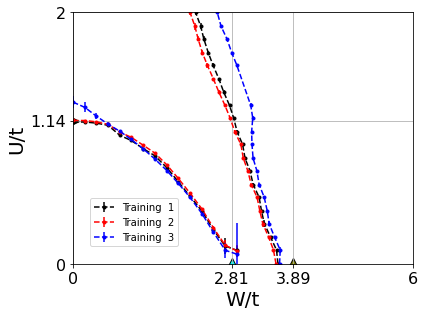

In [ ]:
fig, ax = plt.subplots(figsize=(6,4.5))
# plot result
#im = ax.pcolormesh(X,Y,outs[training].T,cmap="jet")
#fig.colorbar(im,ax=ax)
# theory curve
# ax.contour(x0,y0,np.round(chern_number.T),levels=2)
ax.set_xlim(uW.min(),uW.max())
ax.set_ylim(uU.min(),uU.max())
colors = ["k","red","blue","magenta","green"]
labels = [f"Training  {i+1}" for i in range(5)]
for i in range(3):
    for j,(x,y,dy) in enumerate(bounds[f"{i}"]):
        label = None
        if j == 0:
            label = labels[i]
        ax.errorbar(x,y,yerr=dy,fmt=".--",color=colors[i],label=label)
#for i in [3,4]:
#    for y,x,dx in bounds[f"{i}h"]:
#        ax.errorbar(x,y,xerr=dx,fmt=".--",color=colors[i])
plt.legend(loc='lower left',bbox_to_anchor=(0.05, 0.07, 0.9, .102),
             borderaxespad=0.)

plt.scatter(x=0.,y=1.14,c='g',s=150,marker='>',ec='k')
plt.scatter(x=2.81,y=0,c='cyan',s=150,marker='^',ec='k')
plt.scatter(x=3.89,y=0,c='olive',s=150,marker='^',ec='k')
plt.yticks([0,1.14,2])
plt.xticks([0,2.81,3.89,6])
ax = plt.gca()
ax.set_yticklabels(['0','1.14','2'],fontsize=16)
ax.set_xticklabels(['0','2.81','3.89','6'],fontsize=16)
plt.ylabel("U/t",fontsize=20)
plt.xlabel("W/t",fontsize=20)
plt.grid()
plt.tight_layout()
plt.savefig("boundaries_solo.png",dpi=300)

# Plot main figure

In [ ]:
pick_phases = [18,18,18] # where to do the single cut image

In [ ]:
# for consistency with co-authors
face_colors = {
    'orange': [0.8906, 0.4609, 0.4062],
    'gray': [0.6523, 0.6484, 0.6484],
    'blue': [0.5156, 0.5977, 0.8789]
}
edge_colors = {
    'orange': [0.9961, 0, 0],
    'gray': [0.4805, 0.4766, 0.4766],
    'blue': [0, 0, 0.9961]
}

edge_colors_arr = [ec for ec in edge_colors.values()]
face_colors_arr = [fc for fc in face_colors.values()]

cycler = (plt.cycler(mec=edge_colors_arr)+
          plt.cycler(mfc=face_colors_arr)+
          plt.cycler(color=edge_colors_arr))

plt.rcParams.update({
    #'figure.figsize': (12, 8),
    'font.size': 12,
    #'lines.markeredgewidth': 2,
    #'lines.markersize': 9,
    #'lines.marker': 'x',
    #'lines.linestyle': '-',
    #'lines.linewidth': 3,
    'axes.prop_cycle': cycler
    })

In [ ]:
fitcolor = "k" #,edge_colors["gray"]

In [ ]:
# just cosmetics to make the frame indicating the training region better visible
train_freqss[0], train_phasess[0], train_phasess[1] = np.array([[5.125 , 5.5]]), np.array([[-178 , 178]]), np.array([[-178 , 178]])

In [ ]:
# scale to be percent
for i in range(3):
    outs[i] = 100*outs[i]
    douts[i] = 100*douts[i]
    res[i] = 100*res[i]

In [ ]:
fig, axs = plt.subplots(2, 3, gridspec_kw={'height_ratios': [3, 1.5]},figsize=(14,6),sharey="row")
fillalpha, fillcolor = 0.5, "c"
cmap = "jet" # good diverging cmap: "seismic" https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
vmin, vmax = np.min(outs[:3]), np.max(outs[:3])
for i in range(3):
    pick_phase = pick_phases[i]
    phase90 = X[:,pick_phase][0]
    ax = axs[0,i]
    im = ax.pcolormesh(X,Y,outs[i].T,cmap=cmap, vmin=vmin, vmax=vmax,linewidth=0,rasterized=True)
    im.set_edgecolor('face')
    #fig.colorbar(im,ax=ax)
    ax.contour(x0,y0,np.round(chern_number.T),levels=2)
    dx,dy = 0,0
    ax.set_xlim(uphase.min()-dx,uphase.max()+dx)
    ax.set_ylim(ufreq.min(),ufreq.max())
    ax.set_xticks([-180,-90,0,90,180])
    ax.plot([phase90]*2,[ufreq.min(),ufreq.max()],"--")
    for phases,freqs in zip(train_phasess[i],train_freqss[i]):
        print(phases,freqs)
        # I am sure this can be done more elegantly, but aint nobody got time for that:
        rectcolor="c"
        ax.plot(phases,[freqs[0]]*2,"-",linewidth=4,color="white")
        ax.plot(phases,[freqs[1]]*2,"-",linewidth=4,color="white")
        ax.plot([phases[0]]*2,freqs,"-",linewidth=4,color="white")
        ax.plot([phases[1]]*2,freqs,"-",linewidth=4,color="white")
        ax.plot(phases,[freqs[0]]*2,"-",linewidth=1,color=rectcolor)
        ax.plot(phases,[freqs[1]]*2,"-",linewidth=1,color=rectcolor)
        ax.plot([phases[0]]*2,freqs,"-",linewidth=1,color=rectcolor)
        ax.plot([phases[1]]*2,freqs,"-",linewidth=1,color=rectcolor)
    ax = axs[1,i]
    label = None
    if i == 0:
        label = "data"
        label1 = "training region"
    ax.errorbar(Y[:,pick_phase],outs[i].T[:,pick_phase],yerr=douts[i].T[:,pick_phase],fmt=".--",label=label)
    ax.text(0.08, 0.75,f"{phase90:.0f}°", transform = ax.transAxes) #horizontalalignment='center', verticalalignment='center',
    for phases,freqs in zip(train_phasess[i],train_freqss[i]):
        ax.fill_between(*[freqs],outs[0].T[:,pick_phase].min(),outs[0].T[:,18].max(),alpha=fillalpha,color=fillcolor, label=label1)
    ax.axvline(6.1, color="rebeccapurple", linestyle="--", label="theoretical transition") # expected transition
    ax.axvline(6.8, color="rebeccapurple", linestyle="--") # expected transition

### Boundaries (comment out if not wanted)
for i in range(3):
    for j,(xxx,yyy,dyyy) in enumerate(bounds[f"{i}"]):
        axs[0,i].plot(xxx,yyy,"-",color="white",linewidth=3)
        axs[0,i].plot(xxx,yyy,"-",color=fitcolor,linewidth=1.5) #yerr=dyyy

# Fits
### Training 1
ax = axs[1,0]
xx,yy,fxx, xc, dxc = get_xxyy(5,6.5,ph = -90,training = 0, p0 = [0.1, 0.1, 1,0.1])
ax.plot(xx,fxx,"--",color=fitcolor, label="tanh fit")
ax.axvline(xc, color=fitcolor,label="predicted transition")
xx,yy,fxx, xc, dxc = get_xxyy(6.3,7.6,ph = -90,training = 0, p0 = [10, 0.1, 1,20])
ax.plot(xx,fxx,"--",[xc]*2,[yy.min(),yy.max()],"-",color=fitcolor)
ax.axvline(xc, color=fitcolor)

### Training 2
ax = axs[1,1]
xx,yy,fxx, xc, dxc = get_xxyy(6.3,7.6,ph = -90,training = 1, p0 = [10, -0.1, -1,20])
ax.plot(xx,fxx,"--",[xc]*2,[yy.min(),yy.max()],"-",color=fitcolor)
ax.axvline(xc, color=fitcolor)

### Training 3
ax = axs[1,2]
xx,yy,fxx, xc, dxc = get_xxyy(6.3,7.6,ph = -90,training = 2, p0 = [10, 0.1, 1,20])
ax.plot(xx,fxx,"--",[xc]*2,[yy.min(),yy.max()],"-",color=fitcolor)
ax.axvline(xc, color=fitcolor)
xx,yy,fxx, xc, dxc = get_xxyy(5,6.5,ph = -90,training = 2, p0 = [10, -0.1, -1,20])
ax.plot(xx,fxx,"--",[xc]*2,[yy.min(),yy.max()],"-",color=fitcolor)
ax.axvline(xc, color=fitcolor)



axs[1,0].set_ylabel("Loss (%)",fontsize=16)
for i in range(3):
    axs[0,i].set_xlabel("Shaking Phase (°)",fontsize=16)
    axs[1,i].set_xlabel("Shaking Frequency (kHz)",fontsize=16)
    axs[0,i].set_title(f"Training {i+1}",fontsize=16)


handles, labels = axs[1,0].get_legend_handles_labels()
axs[1,0].legend(handles, labels,bbox_to_anchor=(0.3, 1.02, 2.5, .102), loc='lower left',
           ncol=5, mode="expand", borderaxespad=0.)

plt.tight_layout()
for i in range(3):
    axs[1,i].grid()
axs[0,0].text(-0.07, 1.025,"a",weight="bold", transform = axs[0,0].transAxes,fontsize=16)
axs[1,0].text(-0.07, 1.1,"b",weight="bold", transform = axs[1,0].transAxes,fontsize=16)
axs[0,0].set_ylabel("Shaking Frequency (kHz)",fontsize=16)
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.5, 0.02, 0.4])
fig.colorbar(im, cax=cbar_ax)
cbar_ax.set_title("  Loss (%)")

plt.savefig("KK_master2.pdf")